In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbs-combined/combined_sheet - combined_sheet.csv.csv
/kaggle/input/prods-raw/BBS.xlsx - 20-21.csv
/kaggle/input/prods-raw/BBS.xlsx - 18-19.csv
/kaggle/input/prods-raw/BBS.xlsx - 19-20.csv
/kaggle/input/prods-raw/BBS.xlsx - 17-18.csv


In [2]:
df=pd.read_csv('/kaggle/input/prods-raw/BBS.xlsx - 20-21.csv')
# df=pd.read_csv('/kaggle/input/bbs-combined/combined_sheet - combined_sheet.csv.csv')
df.head()

,HS\nCode,Description of Commodities,Quantity,Value
0,70199090,"ARTCL OF GLASS FIBRES,OTR",7388622,1232659341
1,7020,OTHER ARTICLES OF GLASS,1477049,248746218
2,70200010,GLASS INNER FOR VACUM FLASKS,1395130,222498464
3,70200090,OTHER,81919,26247754
4,71,"NATURL/CLTURE PRL,PRCIUS STON",2214808,1322135511


In [3]:
import warnings

# Filter out warning messages
warnings.filterwarnings('ignore')

# data combining

In [4]:
years=['20-21','19-20','18-19','17-18']
csv_folder_path = '/kaggle/input/prods-raw/BBS.xlsx - '

dfs = {}

for year in years:
    csv_path = csv_folder_path + f'{year}.csv'
    df = pd.read_csv(csv_path)
    df.rename(columns={'HS\nCode': 'code','Description of Commodities': f'des{year}','Quantity': f'qnt{year}','Value': f'val{year}'},inplace=True)
    dfs[year] = df

In [5]:
dfs['19-20']

,code,des19-20,qnt19-20,val19-20
0,71081100,NON-MONETARY POWDER,875,113738
1,71081200,OTHER UNWROUGHT FORMS,10,51617536
2,7110,PLTINUM UNWRUGHT/SMI-MFG/PWDR,0,25857
3,71101900,OTHER PLATINUM,0,25857
4,7111,BASE MTAL SLVR/GOLD CLAD W/PLT,8,85770
...,...,...,...,...
431,74,COPPER AND ARTICLES THEREOF,45806982,24335426920
432,7402,UNREFINED COPPER ANODE ELECTRO,53684,30558597
433,74020000,UNREFIN COPER ANODE ELEC REFIN,53684,30558597
434,7403,REIFINED COPER ALLOY.UNWROUGHT,23710881,12172978413


In [6]:
comibined_df=pd.DataFrame()
    

In [7]:
# Combine DataFrames based on HSCode
combined_df = dfs[years[0]]  # Start with the data from the first year

for year in years:
    dfs[year]['code'] = dfs[year]['code'].astype(str)

for year in years[1:]:
    combined_df = pd.merge(combined_df, dfs[year], on='code', how='outer')

# Rename Price columns with year suffix
for year in years:
    combined_df.rename(columns={'Value': f'val{year}'}, inplace=True)

# Sort the DataFrame based on HSCode
combined_df.sort_values(by='code', inplace=True)

In [8]:
combined_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18
528,70195910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FIBRE GLASS FILTER/STRAINERS,3455.0,1088597.0
529,70195990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER FIBRE GLASS,39948.0,11506471.0
530,70199011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,14693.0,7068502.0
531,70199019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,14.0,30492.0
0,70199090,"ARTCL OF GLASS FIBRES,OTR",7388622.0,1.232659e+09,NaN,NaN,NaN,NaN,NaN,NaN,"ARTCL OF GLASS FIBRES,OTR",1348113.0,255173557.0


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 528 to 549
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   code      552 non-null    object 
 1   des20-21  511 non-null    object 
 2   qnt20-21  511 non-null    float64
 3   val20-21  511 non-null    float64
 4   des19-20  436 non-null    object 
 5   qnt19-20  436 non-null    float64
 6   val19-20  436 non-null    float64
 7   des18-19  437 non-null    object 
 8   qnt18-19  437 non-null    float64
 9   val18-19  437 non-null    float64
 10  des17-18  510 non-null    object 
 11  qnt17-18  510 non-null    float64
 12  val17-18  510 non-null    float64
dtypes: float64(8), object(5)
memory usage: 60.4+ KB


export dataset


In [10]:
combined_csv_path = 'combined_sheet.csv'
combined_df.to_csv(combined_csv_path, index=False)

# TOdo 
have to read from new combined data (combined sheet) and
have to find prod code btn 72-73


In [11]:
df.rename(columns={'HS\nCode': 'code','Description of Commodities': 'des'},inplace=True)

In [12]:
df.head()

,code,des17-18,qnt17-18,val17-18
0,70195910,FIBRE GLASS FILTER/STRAINERS,3455.0,1088597.0
1,70195990,OTHER FIBRE GLASS,39948.0,11506471.0
2,70199011,UNKNOWN,14693.0,7068502.0
3,70199019,UNKNOWN,14.0,30492.0
4,70199090,"ARTCL OF GLASS FIBRES,OTR",1348113.0,255173557.0


In [13]:

new_df = pd.DataFrame(columns=df.columns)

# Loop over each row in the original DataFrame
for index, row in df.iterrows():
    # Check the condition based on the 'code' column
    if  str(row['code']).startswith('72') or str(row['code']).startswith('73'):
        # Append the row to the new DataFrame if the condition is met
        new_df = new_df.append(row)

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,code,des17-18,qnt17-18,val17-18
0,72,IRON OR STEEL,6.118993e+09,2.345690e+11
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,9.191164e+07,2.824417e+09
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",9.185500e+07,2.819048e+09
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,5.664300e+04,5.368696e+06
4,7202,FERRO-ALLOYS,4.199913e+07,3.910932e+09


In [14]:
for index, row in new_df.iterrows():
    # 'index' will contain the row index, and 'row' will contain the data in that row as a pandas Series
    # You can access individual values in the row using column names:
    value_column1 = row['Quantity']
    value_column2 = row['Value']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(value_column1==0):
        new_df.at[index,'ppc']=0
    else:
        new_df.at[index,'ppc']=value_column2/value_column1

    # Your processing or computations for each row go here
    # For example, you can print the values in each row:
#     print(f"Row {index}: Column 1 = {value_column1}, Column 2 = {value_column2}")

KeyError: 'Quantity'

In [ ]:
new_df.head()

In [ ]:
train_df=df[['Quantity','Value','ppc']].copy()
tr_np=train_df.to_numpy()
type(tr_np)
len(tr_np)

In [ ]:
train_new_df=new_df[['Quantity','Value','ppc']].copy()
tr_new_np=train_new_df.to_numpy()
type(tr_new_np)
len(tr_new_np)

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6), timings= False)
visualizer.fit(tr_new_np)        # Fit data to visualizer
visualizer.show()

In [ ]:
mb_model = MiniBatchKMeans(n_clusters = 3, batch_size=1000, max_iter=300)
# v_tokens=model.wv.get_normed_vectors()

# type(avg_vec_list)
mb_model.fit(tr_new_np)

In [ ]:
len(mb_model.labels_)

In [ ]:
new_df['mb_cluster']=mb_model.labels_

In [ ]:
import matplotlib.pyplot as plt

# plotting clusters

# def plot(dataset,column):
    

#     minibatch_groups = dataset.groupby(column)
#     num_clusters = len(minibatch_groups)
#     num_cols = 3  # Number of columns to display

#     num_rows = num_clusters // num_cols
#     if num_clusters % num_cols != 0:
#         num_rows += 1

#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))

#     for i, (cluster, group) in enumerate(minibatch_groups):
#         tokens = []
#         for token_list in group['Description of Commodities']:
#             tokens.extend(token_list)
#         common_tokens = pd.Series(tokens).value_counts().head(10)
#         common_tokens = common_tokens.iloc[::-1]
#         # Plot the most common words in a subplot
# #         ax = axes[i // num_cols, i % num_cols]
# #         common_tokens.plot(kind='barh', ax=ax)
# #         ax.set_title(f"Cluster {cluster}: Most Common Words")
# #         ax.set_xlabel("Words")
# #         ax.set_ylabel("Frequency")
# #         ax.tick_params(axis='x', rotation=45)

#     plt.tight_layout()
#     plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot(dataset,column):
    

    minibatch_groups = df.groupby(column).apply(lambda x: x.sort_values(by='ppc'))
    num_clusters = len(minibatch_groups)
    num_cols = 3  # Number of columns to display

    num_rows = num_clusters // num_cols
    if num_clusters % num_cols != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
    sorted_group = minibatch_groups.sort_values(by=price_column, ascending=False)

    for i, (cluster, group) in enumerate(minibatch_groups):
        prods = []
        for prod in group['Description of Commodities']:
            prods.append(prod)
        common_tokens = pd.Series(tokens).value_counts().head(10)
        common_tokens = common_tokens.iloc[::-1]
        # Plot the most common words in a subplot
        ax = axes[i // num_cols, i % num_cols]
        common_tokens.plot(kind='barh', ax=ax)
        ax.set_title(f"Cluster {cluster}: Most Common Words")
        ax.set_xlabel("Words")
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
# plot(df,'mb_cluster','Value')

In [ ]:
for group_name, group_data in new_df.groupby('mb_cluster'):
    print(group_data['code'])

In [ ]:
import pandas as pd



plt.figure(figsize=(8, 6))
for group_name, group_data in new_df.groupby('mb_cluster'):
    plt.barh((group_data['des']),group_data['ppc'], label=group_name)
    plt.xlabel('price')
    plt.ylabel('code')
    plt.title('Values within Each Group (Matplotlib)')
#     plt.legend()
    plt.show()


# Combined data 

In [15]:
c_df=pd.read_csv('/kaggle/input/bbs-combined/combined_sheet - combined_sheet.csv.csv')
c_df.fillna(0, inplace=True)
c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18
0,70195910,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,FIBRE GLASS FILTER/STRAINERS,3455.0,1088597.0
1,70195990,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,OTHER FIBRE GLASS,39948.0,11506471.0
2,70199011,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,UNKNOWN,14693.0,7068502.0
3,70199019,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,UNKNOWN,14.0,30492.0
4,70199090,"ARTCL OF GLASS FIBRES,OTR",7388622.0,1.232659e+09,0,0.0,0.0,0,0.0,0.0,"ARTCL OF GLASS FIBRES,OTR",1348113.0,255173557.0


> All metal imported df

In [16]:
m_c_df = pd.DataFrame(columns=c_df.columns)

# Loop over each row in the original DataFrame
for index, row in c_df.iterrows():
    # Check the condition based on the 'code' column
    if  str(row['code']).startswith('72') or str(row['code']).startswith('73'):
        # Append the row to the new DataFrame if the condition is met
        m_c_df = m_c_df.append(row)

# Reset the index of the new DataFrame
m_c_df.reset_index(drop=True, inplace=True)

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18
0,72,IRON OR STEEL,6.865766e+09,2.760791e+11,IRON OR STEEL,8.360293e+09,2.950291e+11,IRON OR STEEL,6.960985e+09,2.763346e+11,IRON OR STEEL,6.118993e+09,2.345690e+11
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,8.522280e+06,3.628712e+08,PIG IRON BLOCK/OTR PRIMARY FOR,3.364934e+07,1.116999e+09,PIG IRON BLOCK/OTR PRIMARY FOR,1.285522e+08,4.291003e+09,PIG IRON BLOCK/OTR PRIMARY FO,9.191164e+07,2.824417e+09
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",8.522262e+06,3.628687e+08,"PIG IRON,N-ALOY<='5% PHSPHRS",3.364898e+07,1.115936e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",1.285518e+08,4.290746e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",9.185500e+07,2.819048e+09
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,1.800000e+01,2.495000e+03,ALLOY PIG IRON; SPIEGELEISEN,3.540000e+02,1.062582e+06,ALLOY PIG IRON; SPIEGELEISEN,4.650000e+02,2.577530e+05,ALLOY PIG IRON; SPIEGELEISEN,5.664300e+04,5.368696e+06
4,7202,FERRO-ALLOYS,5.485431e+07,4.589605e+09,FERRO-ALLOYS,4.938500e+07,3.938348e+09,FERRO-ALLOYS,5.083866e+07,4.333239e+09,FERRO-ALLOYS,4.199913e+07,3.910932e+09


In [17]:
m_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   code      427 non-null    object 
 1   des20-21  427 non-null    object 
 2   qnt20-21  427 non-null    float64
 3   val20-21  427 non-null    float64
 4   des19-20  427 non-null    object 
 5   qnt19-20  427 non-null    float64
 6   val19-20  427 non-null    float64
 7   des18-19  427 non-null    object 
 8   qnt18-19  427 non-null    float64
 9   val18-19  427 non-null    float64
 10  des17-18  427 non-null    object 
 11  qnt17-18  427 non-null    float64
 12  val17-18  427 non-null    float64
dtypes: float64(8), object(5)
memory usage: 43.5+ KB


In [18]:
for index, row in m_c_df.iterrows():
    # 'index' will contain the row index, and 'row' will contain the data in that row as a pandas Series
    # You can access individual values in the row using column names:
    q21 = row['qnt20-21']
    v21 = row['val20-21']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q21==0):
        m_c_df.at[index,'ppc21']=0
    else:
        m_c_df.at[index,'ppc21']=q21/v21
    
#     
    q20 = row['qnt19-20']
    v20 = row['val19-20']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q20==0):
        m_c_df.at[index,'ppc20']=0
    else:
        m_c_df.at[index,'ppc20']=q20/v20
        
    q19 = row['qnt18-19']
    v19 = row['val18-19']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q19==0):
        m_c_df.at[index,'ppc19']=0
    else:
        m_c_df.at[index,'ppc19']=q19/v19
        
# 
    q18 = row['qnt17-18']
    v18 = row['val17-18']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q18==0):
        m_c_df.at[index,'ppc18']=0
    else:
        m_c_df.at[index,'ppc18']=q18/v18
        

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18
0,72,IRON OR STEEL,6.865766e+09,2.760791e+11,IRON OR STEEL,8.360293e+09,2.950291e+11,IRON OR STEEL,6.960985e+09,2.763346e+11,IRON OR STEEL,6.118993e+09,2.345690e+11,0.024869,0.028337,0.025190,0.026086
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,8.522280e+06,3.628712e+08,PIG IRON BLOCK/OTR PRIMARY FOR,3.364934e+07,1.116999e+09,PIG IRON BLOCK/OTR PRIMARY FOR,1.285522e+08,4.291003e+09,PIG IRON BLOCK/OTR PRIMARY FO,9.191164e+07,2.824417e+09,0.023486,0.030125,0.029959,0.032542
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",8.522262e+06,3.628687e+08,"PIG IRON,N-ALOY<='5% PHSPHRS",3.364898e+07,1.115936e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",1.285518e+08,4.290746e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",9.185500e+07,2.819048e+09,0.023486,0.030153,0.029960,0.032584
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,1.800000e+01,2.495000e+03,ALLOY PIG IRON; SPIEGELEISEN,3.540000e+02,1.062582e+06,ALLOY PIG IRON; SPIEGELEISEN,4.650000e+02,2.577530e+05,ALLOY PIG IRON; SPIEGELEISEN,5.664300e+04,5.368696e+06,0.007214,0.000333,0.001804,0.010551
4,7202,FERRO-ALLOYS,5.485431e+07,4.589605e+09,FERRO-ALLOYS,4.938500e+07,3.938348e+09,FERRO-ALLOYS,5.083866e+07,4.333239e+09,FERRO-ALLOYS,4.199913e+07,3.910932e+09,0.011952,0.012540,0.011732,0.010739


In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def scale_columns(df, cols=None):
    scaler = MinMaxScaler()
    if cols is None:
        cols = df.columns
    df[cols] = scaler.fit_transform(df[cols])
    return df

m_c_df = scale_columns(m_c_df, cols=['qnt20-21','qnt19-20','qnt18-19','qnt17-18','val20-21','val19-20','val18-19','val17-18'])

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18
0,72,IRON OR STEEL,1.213311e-01,1.000000e+00,IRON OR STEEL,2.039681e-01,1.000000,IRON OR STEEL,2.316536e-01,1.000000e+00,IRON OR STEEL,0.196868,1.000000,0.024869,0.028337,0.025190,0.026086
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,1.506049e-04,1.314374e-03,PIG IRON BLOCK/OTR PRIMARY FOR,8.209509e-04,0.003786,PIG IRON BLOCK/OTR PRIMARY FOR,4.278072e-03,1.552829e-02,PIG IRON BLOCK/OTR PRIMARY FO,0.002957,0.012041,0.023486,0.030125,0.029959,0.032542
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",1.506046e-04,1.314365e-03,"PIG IRON,N-ALOY<='5% PHSPHRS",8.209422e-04,0.003782,"PIG IRON,N-ALOY<='5% PHSPHRS",4.278057e-03,1.552735e-02,"PIG IRON,N-ALOY<='5% PHSPHRS",0.002955,0.012018,0.023486,0.030153,0.029960,0.032584
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,3.180942e-10,9.037264e-09,ALLOY PIG IRON; SPIEGELEISEN,8.636623e-09,0.000004,ALLOY PIG IRON; SPIEGELEISEN,1.547467e-08,9.327568e-07,ALLOY PIG IRON; SPIEGELEISEN,0.000002,0.000023,0.007214,0.000333,0.001804,0.010551
4,7202,FERRO-ALLOYS,9.693800e-04,1.662424e-02,FERRO-ALLOYS,1.204858e-03,0.013349,FERRO-ALLOYS,1.691853e-03,1.568113e-02,FERRO-ALLOYS,0.001351,0.016673,0.011952,0.012540,0.011732,0.010739


In [20]:
train_m_df=m_c_df[['qnt20-21','qnt19-20','qnt18-19','qnt17-18','val20-21','val19-20','val18-19','val17-18']].copy()
tr_new_np=train_m_df.to_numpy()
type(tr_new_np)
len(tr_new_np)

427

In [21]:
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

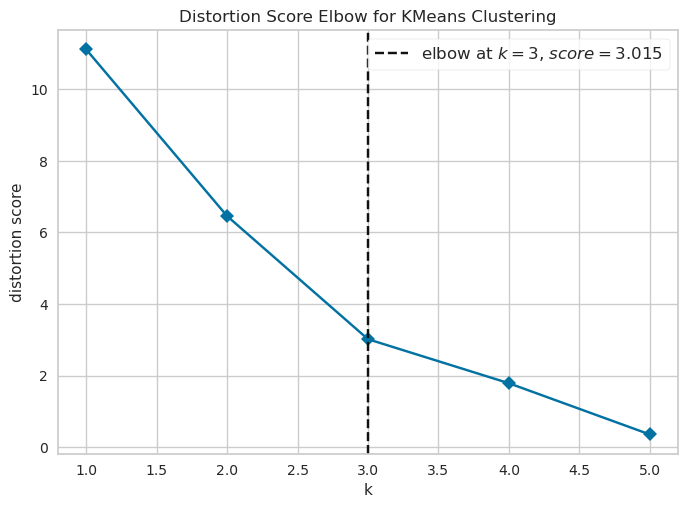

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6), timings= False)
visualizer.fit(tr_new_np)        # Fit data to visualizer
visualizer.show()

In [23]:
mb_model = MiniBatchKMeans(n_clusters = 3, batch_size=100, max_iter=300)
# v_tokens=model.wv.get_normed_vectors()

# type(avg_vec_list)
mb_model.fit(tr_new_np)
len(mb_model.labels_)

427

In [24]:
m_c_df['mb_cluster']=mb_model.labels_

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot(dataset,column):
    

    minibatch_groups = dataset.groupby(column).apply(lambda x: x.sort_values(by='mb_cluster'))
    num_clusters = len(minibatch_groups)
    num_cols = 3  # Number of columns to display

    num_rows = num_clusters // num_cols
    if num_clusters % num_cols != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
    sorted_group = minibatch_groups.sort_values(by=price_column, ascending=False)

    for i, (cluster, group) in enumerate(minibatch_groups):
        prods = []
        for prod in group['des20-21']:
            prods.append(prod)
        common_tokens = pd.Series(tokens).value_counts().head(10)
        common_tokens = common_tokens.iloc[::-1]
        # Plot the most common words in a subplot
        ax = axes[i // num_cols, i % num_cols]
        common_tokens.plot(kind='barh', ax=ax)
        ax.set_title(f"Cluster {cluster}: Most Common Words")
        ax.set_xlabel("Words")
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [26]:
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    print(group_data['code'])

1          7201
2      72011000
4          7202
9      72023000
16         7203
         ...   
373    73181590
395        7321
397    73219000
420        7326
426    73269090
Name: code, Length: 74, dtype: object
0            72
19         7204
25     72044900
37         7208
52     72083920
89     72104920
117    72122090
240          73
Name: code, dtype: object
3      72015000
5      72021100
6      72021900
7      72022100
8      72022900
         ...   
421    73261100
422    73261900
423    73262010
424    73262090
425    73269010
Name: code, Length: 345, dtype: object


In [27]:
group_counts = m_c_df['mb_cluster'].value_counts()

print(group_counts)

2    345
0     74
1      8
Name: mb_cluster, dtype: int64


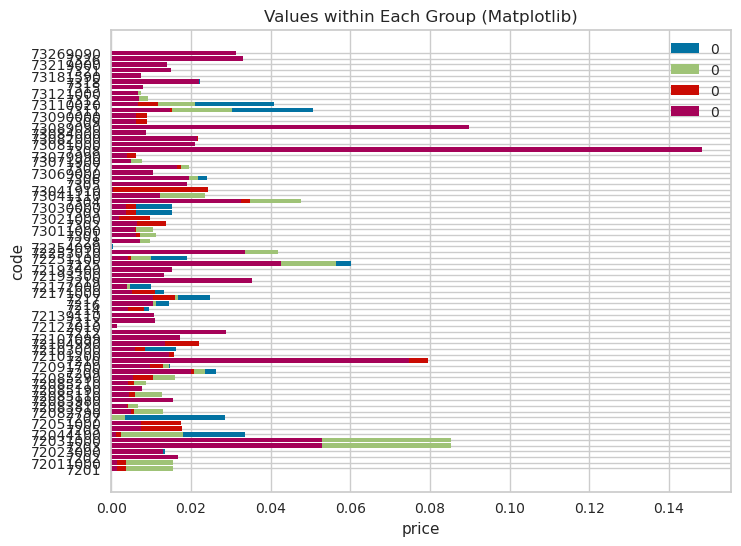

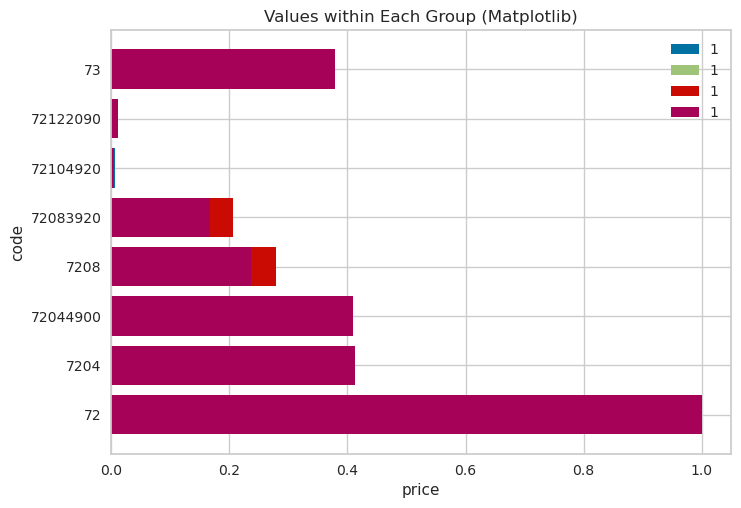

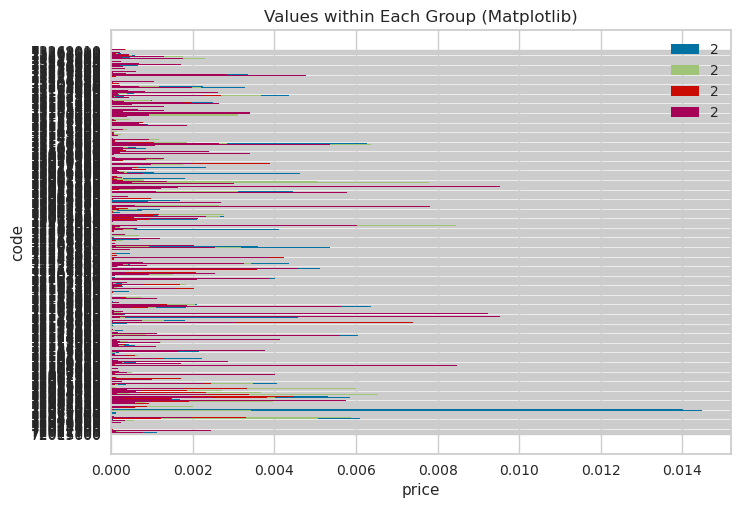

In [28]:
import pandas as pd

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    plt.barh((group_data['code']),group_data['val17-18'], label=group_name)
    plt.barh((group_data['code']),group_data['val18-19'], label=group_name)
    plt.barh((group_data['code']),group_data['val19-20'], label=group_name)
    plt.barh((group_data['code']),group_data['val20-21'], label=group_name)
    plt.xlabel('price')
    plt.ylabel('code')
    plt.title('Values within Each Group (Matplotlib)')
    plt.legend()
    plt.show()

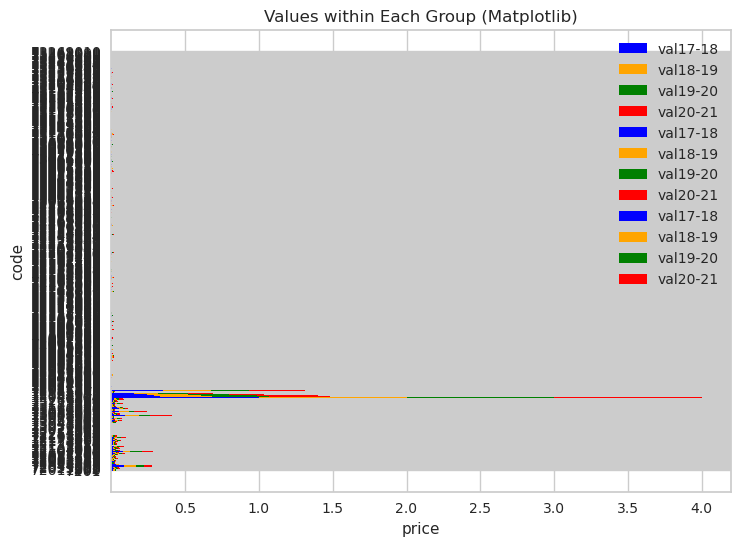

In [29]:
import numpy as np

plt.figure(figsize=(8, 6))
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    plt.barh(group_data['code'], group_data['val17-18'], label='val17-18', color='blue')
    plt.barh(group_data['code'], group_data['val18-19'], label='val18-19', left=group_data['val17-18'], color='orange')
    plt.barh(group_data['code'], group_data['val19-20'], label='val19-20', left=group_data['val17-18'] + group_data['val18-19'], color='green')
    plt.barh(group_data['code'], group_data['val20-21'], label='val20-21', left=group_data['val17-18'] + group_data['val18-19'] + group_data['val19-20'], color='red')

plt.xlabel('price')
plt.ylabel('code')
plt.title('Values within Each Group (Matplotlib)')
plt.legend()
plt.show()


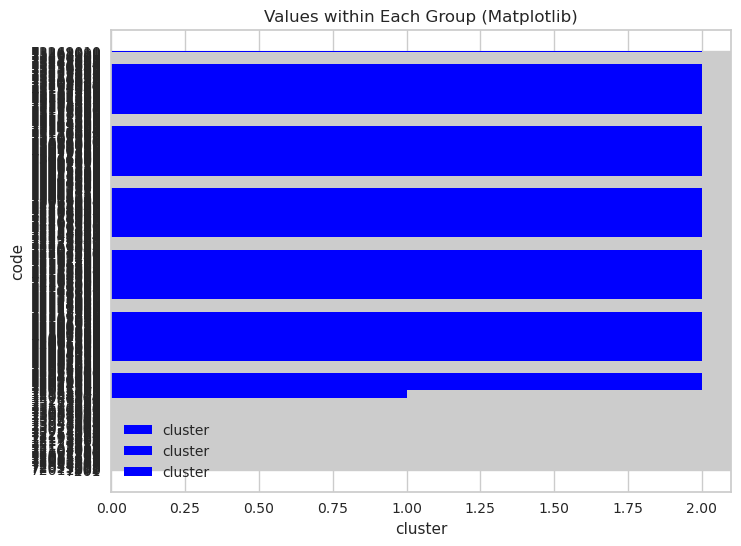

In [30]:
import numpy as np

plt.figure(figsize=(8, 6))
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    plt.barh(group_data['code'], group_data['mb_cluster'], label='cluster', color='blue')
    

plt.xlabel('cluster')
plt.ylabel('code')
plt.title('Values within Each Group (Matplotlib)')
plt.legend()
plt.show()


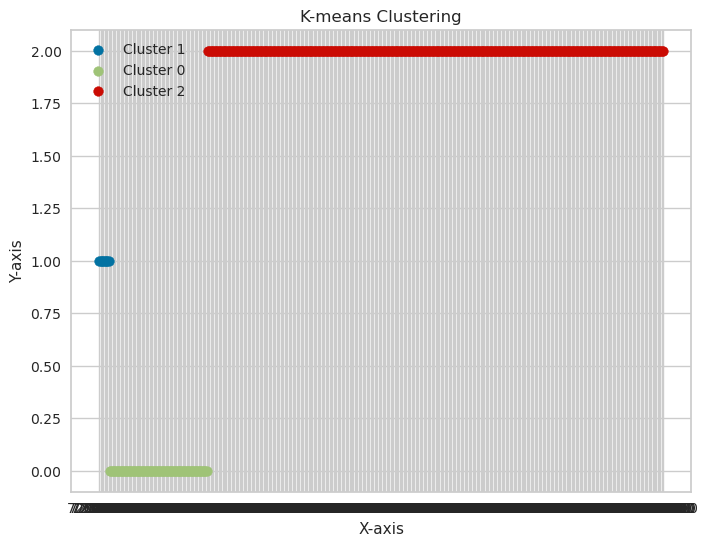

In [31]:
plt.figure(figsize=(8, 6))
for cluster in m_c_df['mb_cluster'].unique():
    cluster_data = m_c_df[m_c_df['mb_cluster'] == cluster]
    plt.scatter(cluster_data['code'], cluster_data['mb_cluster'], label=f'Cluster {cluster}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [32]:
m_c_df.sort_values(by='mb_cluster', ascending=True, inplace=True)
m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18,mb_cluster
426,73269090,OTR ARTICLES OF IRON OR STEEL,0.000602,0.031231,OTR ARTICLES OF IRON OR STEEL,0.000389,0.015229,OTR ARTICLES OF IRON OR STEEL,0.000556,0.017781,OTR ARTICLES OF IRON OR STEEL,0.000534,0.016261,0.003949,0.003547,0.003400,0.004355,0
53,72083980,OTR THICKNESS OF LESS THAN 3M,0.001556,0.015553,OTR THICKNESS OF LESS THAN 3MM,0.001373,0.006774,OTR THICKNESS OF LESS THAN 3MM,0.003944,0.014695,OTR THICKNESS OF LESS THAN 3M,0.001848,0.008239,0.020507,0.028155,0.029185,0.029729,0
178,72193300,FLAT-ROL STL THICK 1 - 3MM,0.000572,0.013235,FLAT-ROL STL THICK 1 - 3MM,0.000523,0.008180,FLAT-ROL STL THICK 1 - 3MM,0.000626,0.007646,FLAT-ROL STL THICK 1 - 3MM,0.000453,0.006749,0.008861,0.008886,0.008896,0.008901,0
179,72193400,FLAT-ROL STEL PRDT C/ROL.5-1M,0.000704,0.015231,FLAT-ROL STEL PRDT C/ROL.5-1MM,0.000590,0.008547,FLAT-ROL STEL PRDT C/ROL.5-1MM,0.000788,0.009095,FLAT-ROL STEL PRDT C/ROL.5-1MM,0.000429,0.005615,0.009472,0.009583,0.009421,0.010132,0
50,72083810,IMPORT VAT REGISTER IRON/STEE,0.000447,0.003998,IMPORT VAT REGISTER IRON/STEEL,0.000713,0.004194,IMPORT VAT REGISTER IRON/STEEL,0.001423,0.006617,IMPORT VAT REGISTER IRON/STEE,0.001054,0.005942,0.022928,0.023610,0.023384,0.023502,0


In [33]:
silhouette_avg = silhouette_score(tr_new_np, mb_model.labels_)
print(silhouette_avg)

0.6936209071747046


In [34]:
mb_cl_df = 'minibatch_combined_cluster.csv'
m_c_df.to_csv(mb_cl_df, index=False)

In [35]:
from skopt import gp_minimize
from skopt.acquisition import gaussian_ei

# Define the objective function
def objective_function(x):
    return (x[0] - 2) ** 2 + 3  # Note: x is a list of parameters

# Define the search space
space = [(-5.0, 5.0)]  # Specify the range for each parameter

# Use Bayesian optimization with entropy search (EI)
result = gp_minimize(
    objective_function,
    space,
    n_calls=10,
    acq_func="EI",  # Use Expected Improvement for entropy search
    random_state=42
)

# Print the best parameters and corresponding objective value
print("Best Parameters:", result.x)
print("Best Objective Value:", result.fun)



Best Parameters: [1.5088847294885301]
Best Objective Value: 3.2411942089295542


In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Simulated data
np.random.seed(42)


def clustering_quality(n_clusters):
    gmm = GaussianMixture(n_components=n_clusters)
    labels = gmm.fit_predict(tr_new_np)
    quality_metric = silhouette_score(tr_new_np, labels)
    return -quality_metric  # Minimize negative silhouette score

# Try different numbers of clusters and evaluate the quality
num_clusters_list = range(3, 15)
silhouette_scores = []

max_score=-10
for num_clusters in num_clusters_list:
    score = clustering_quality(num_clusters)
    if (score>max_score):
        max_score=score
    silhouette_scores.append(score)

# Find the optimal number of clusters based on the maximum silhouette score
optimal_n_clusters = num_clusters_list[np.argmax(silhouette_scores)]

print("Silhouette Scores:", silhouette_scores)
print("Max Silhouette Scores:", max_score)
print("Optimal Number of Clusters:", optimal_n_clusters)

Silhouette Scores: [-0.9756556874446181, -0.9701405801602357, -0.9630559437987292, -0.6227209325331626, -0.6198116068930525, -0.5648915653442445, -0.608772570169532, -0.5647517979185206, -0.6455602221488588, -0.6441404839415131, -0.5834973168726665, -0.6888086760933714]
Max Silhouette Scores: -0.5647517979185206
Optimal Number of Clusters: 10


In [37]:
gmm = GaussianMixture(n_components=10)
labels = gmm.fit_predict(tr_new_np)
print(len(labels))
sli_gmm= silhouette_score(tr_new_np, labels)
print(sli_gmm)

427
0.6846051643151284


In [38]:
proba = gmm.predict_proba(tr_new_np)
print(proba.shape)
proba[3]

(427, 10)


array([9.99972614e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.24565941e-31, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.73862658e-05])

In [39]:
m_c_df['gmm_cluster']

KeyError: 'gmm_cluster'

In [40]:
m_c_df = m_c_df.drop('mb_cluster', axis=1)


In [41]:
m_c_df['gmm_cluster']=labels
# m_c_df.head()

group_counts = m_c_df['gmm_cluster'].value_counts()

print(group_counts)

0    337
9     76
5      6
6      2
1      1
8      1
7      1
4      1
2      1
3      1
Name: gmm_cluster, dtype: int64


In [42]:
m_c_df.sort_values(by='gmm_cluster', ascending=True, inplace=True)
m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18,gmm_cluster
356,73152000,SKID CHAIN OF IRON OR STEEL,5.399473e-07,0.000024,SKID CHAIN OF IRON OR STEEL,2.271871e-07,0.000013,SKID CHAIN OF IRON OR STEEL,6.414168e-07,0.000038,SKID CHAIN OF IRON OR STEEL,0.000002,0.000033,0.004651,0.002376,0.001830,0.009497,0
243,73012000,"WELDED ANGLE,SHAPE IRON/STEE",2.321858e-06,0.000076,"WELDED ANGLE,SHAPE IRON/STEEL",4.308391e-05,0.000936,"WELDED ANGLE,SHAPE IRON/STEEL",1.955316e-05,0.000857,"WELDED ANGLE,SHAPE IRON/STEE",0.000061,0.002090,0.006293,0.006395,0.002480,0.003878,0
342,73141900,OTR WOVEN PRODUCT OF IRON/S,9.159647e-06,0.000154,OTR WOVEN PRODUCT OF IRON/STEL,4.536423e-06,0.000083,OTR WOVEN PRODUCT OF IRON/STEL,5.638371e-06,0.000072,OTR WOVEN PRODUCT OF IRON/ST,0.000004,0.000076,0.012167,0.007589,0.008495,0.006927,0
343,73142000,"IRON/STL GRIL,NETING,3MM+WIR",3.355364e-07,0.000053,"IRON/STL GRIL,NETING,3MM+WIRE",1.750160e-06,0.000074,"IRON/STL GRIL,NETING,3MM+WIRE",1.273785e-05,0.000238,"IRON/STL GRIL,NETING,3MM+WIRE",0.000003,0.000106,0.001290,0.003272,0.005829,0.003248,0
344,73143100,PLAITED OR COATED WITH ZINC,7.866824e-07,0.000022,PLAITED OR COATED WITH ZINC,2.196923e-06,0.000052,PLAITED OR COATED WITH ZINC,4.081186e-06,0.000042,PLAITED OR COATED WITH ZINC,0.000005,0.000066,0.007314,0.005897,0.010483,0.009150,0


In [ ]:
mb_cl_df = 'Gaussian_mixer_cluster(silhouette_scores_as_entropy_func).csv'
m_c_df.to_csv(mb_cl_df, index=False)

**todo use other cluster algorithm (hierarchical) **

**Freeze requirements**

In [43]:
import pkg_resources
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["{}=={}".format(pkg.key, pkg.version) for pkg in installed_packages])
with open('requirements.txt', 'w') as f:
    for pkg in installed_packages_list:
        f.write("%s\n" % pkg)
